In [1]:
import numpy as np
import pandas as pd
import seaborn as sn
from netCDF4 import Dataset
from google.colab import files
import matplotlib.pyplot as plt
from sklearn import linear_model
from keras.models import Sequential
from keras.callbacks import ModelCheckpoint
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from keras.layers import Dense, Dropout, Flatten, Activation
from sklearn.metrics import classification_report, r2_score, mean_absolute_error, mean_squared_error, confusion_matrix

In [2]:
!pip install netcdf4

# Q1

## Load cifar10 dataset

In [3]:
# load dataset
(X_train, Y_train), (X_test, Y_test) = cifar10.load_data()
print('Train: X=%s, y=%s' % (X_train.shape, Y_train.shape))
print('Test: X=%s, y=%s' % (X_test.shape, Y_test.shape))

170508288/170498071 [==============================] - 4s 0us/step
Train: X=(50000, 32, 32, 3), y=(50000, 1)
Test: X=(10000, 32, 32, 3), y=(10000, 1)


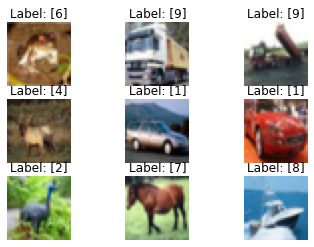

In [4]:
# plot first 9 images
for i in range(9):
	plt.subplot(330 + 1 + i)
	plt.imshow(X_train[i])
	plt.axis('off')
	plt.title('Label: {}'.format(Y_train[i]))
plt.show()

## MLP

[ref](https://www.kaggle.com/guesejustin/object-recognition-mlp-cnn-efficientnet-on-cifar)

In [5]:
num_classes = 10

In [6]:
# Change the labels from integer to categorical data
y_train = to_categorical(Y_train)
y_test = to_categorical(Y_test)

In [7]:
x_train = X_train.astype('float32')
x_test = X_test.astype('float32')
x_train /= 255
x_test /= 255

In [8]:
print('Train: X=%s, y=%s' % (x_train.shape, y_train.shape))
print('Test: X=%s, y=%s' % (x_test.shape, y_test.shape))

Train: X=(50000, 32, 32, 3), y=(50000, 10)
Test: X=(10000, 32, 32, 3), y=(10000, 10)


In [9]:
model = Sequential()
model.add(Flatten(input_shape = x_train.shape[1:]))
model.add(Dense(1000, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(num_classes, activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 3072)              0         
                                                                 
 dense (Dense)               (None, 1000)              3073000   
                                                                 
 dropout (Dropout)           (None, 1000)              0         
                                                                 
 dense_1 (Dense)             (None, 512)               512512    
                                                                 
 dropout_1 (Dropout)         (None, 512)               0         
                                                                 
 dense_2 (Dense)             (None, 10)                5130      
                                                                 
Total params: 3,590,642
Trainable params: 3,590,642
Non-

In [10]:
model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

In [11]:
history = model.fit(x_train, y_train, batch_size=256, epochs=20, validation_data=(x_test, y_test))

Epoch 1/20
196/196 [==============================] - 44s 215ms/step - loss: 2.5688 - accuracy: 0.2176 - val_loss: 2.0232 - val_accuracy: 0.2608
Epoch 2/20
196/196 [==============================] - 24s 124ms/step - loss: 1.9159 - accuracy: 0.3068 - val_loss: 1.8091 - val_accuracy: 0.3388
Epoch 3/20
196/196 [==============================] - 24s 124ms/step - loss: 1.8288 - accuracy: 0.3455 - val_loss: 1.8083 - val_accuracy: 0.3491
Epoch 4/20
196/196 [==============================] - 24s 122ms/step - loss: 1.7663 - accuracy: 0.3672 - val_loss: 1.7073 - val_accuracy: 0.3975
Epoch 5/20
196/196 [==============================] - 25s 129ms/step - loss: 1.7196 - accuracy: 0.3854 - val_loss: 1.6409 - val_accuracy: 0.4158
Epoch 6/20
196/196 [==============================] - 25s 126ms/step - loss: 1.6819 - accuracy: 0.3986 - val_loss: 1.7445 - val_accuracy: 0.3672
Epoch 7/20
196/196 [==============================] - 24s 124ms/step - loss: 1.6513 - accuracy: 0.4084 - val_loss: 1.7577 - val_ac

In [12]:
[test_loss, test_acc] = model.evaluate(x_test, y_test)
print("Evaluation result on Test Data : Loss = {}, accuracy = {}".format(test_loss, test_acc))

313/313 [==============================] - 4s 11ms/step - loss: 1.4807 - accuracy: 0.4832
Evaluation result on Test Data : Loss = 1.4807353019714355, accuracy = 0.4832000136375427


Text(0.5, 1.0, 'Accuracy Curves')

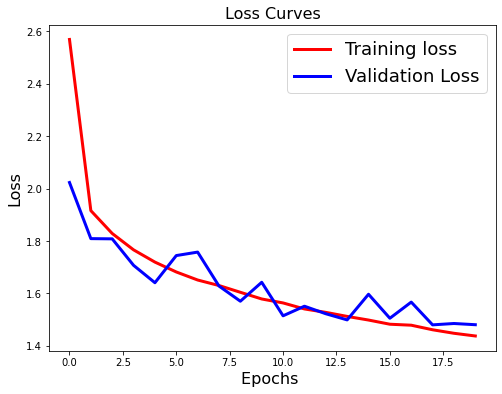

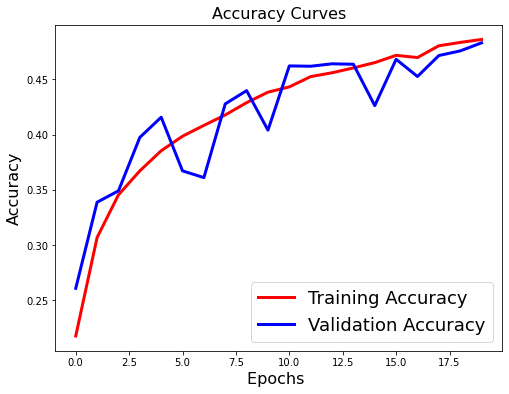

In [13]:
#Plot the Loss Curves
plt.figure(figsize=[8,6])
plt.plot(history.history['loss'],'r',linewidth=3.0)
plt.plot(history.history['val_loss'],'b',linewidth=3.0)
plt.legend(['Training loss', 'Validation Loss'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Loss',fontsize=16)
plt.title('Loss Curves',fontsize=16)
#Plot the Accuracy Curves
plt.figure(figsize=[8,6]) 
plt.plot(history.history['accuracy'],'r',linewidth=3.0) 
plt.plot(history.history['val_accuracy'],'b',linewidth=3.0) 
plt.legend(['Training Accuracy', 'Validation Accuracy'],fontsize=18) 
plt.xlabel('Epochs ',fontsize=16) 
plt.ylabel('Accuracy',fontsize=16) 
plt.title('Accuracy Curves',fontsize=16)

In [14]:
y_pred = model.predict(X_test)
y_pred = np.argmax(y_pred, axis=1)

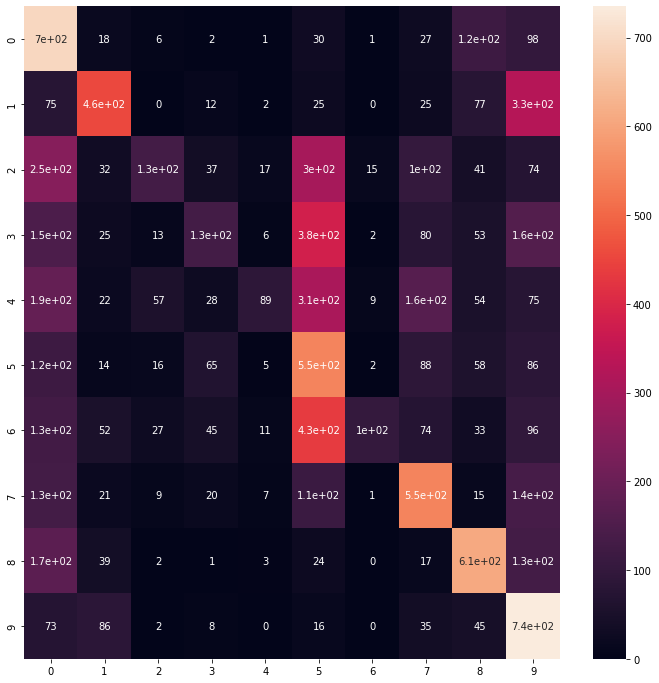

In [15]:
cnf_matrix = confusion_matrix(Y_test, y_pred)

fig, ax = plt.subplots(figsize=(12,12))

sn.heatmap(
    cnf_matrix,
    annot=True,
    ax = ax
)
plt.show()

In [16]:
print(classification_report(Y_test, y_pred))

              precision    recall  f1-score   support

           0       0.35      0.70      0.47      1000
           1       0.60      0.46      0.52      1000
           2       0.50      0.13      0.21      1000
           3       0.38      0.13      0.20      1000
           4       0.63      0.09      0.16      1000
           5       0.25      0.55      0.34      1000
           6       0.77      0.10      0.18      1000
           7       0.47      0.55      0.51      1000
           8       0.55      0.61      0.58      1000
           9       0.38      0.73      0.50      1000

    accuracy                           0.40     10000
   macro avg       0.49      0.40      0.37     10000
weighted avg       0.49      0.40      0.37     10000



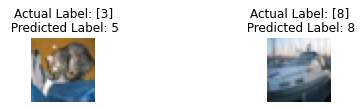

In [17]:
# Correct Prediction
for i in range(100):
  if Y_test[i] == y_pred[i]:
    plt.subplot(330 + 1 + i)
    plt.imshow(X_test[i])
    plt.axis('off')
    plt.title('Actual Label: {}\n Predicted Label: {}'.format(Y_test[i], y_pred[i]))
    break

# Wrong Prediction
for i in range(100):
  if Y_test[i] != y_pred[i]:
    plt.subplot(330 + 1 + i)
    plt.imshow(X_test[i])
    plt.axis('off')
    plt.title('Actual Label: {}\n Predicted Label: {}'.format(Y_test[i], y_pred[i]))
    break
plt.show()

# Q2

## Load and split dataset

In [18]:
files.upload()
nc = Dataset('tempStJohns.nc')

Saving tempStJohns.nc to tempStJohns (1).nc


In [19]:
def split_dataset(x_len, y_len, data):
  X, Y = [],[]
  record_num = data.shape[0]//(x_len + y_len)
  for i in range(record_num):
    X.append(data[i:i+x_len])
    Y.append(data[i+x_len:i+x_len+y_len])
  return pd.DataFrame(X),pd.DataFrame(Y)

In [20]:
temp = nc['t2m'][:,0,0,0] - 273.15
feature, target = split_dataset(6, 6,temp.data)

In [21]:
X_train, X_test, y_train, y_test = train_test_split(feature, target, test_size=0.2)

## Linear regression

In [22]:
model_lr = linear_model.LinearRegression()
model_lr.fit(X_train, y_train)

LinearRegression()

In [23]:
y_pred_lr = model_lr.predict(X_test)
print('R2-score: %.2f'
      % r2_score(y_test, y_pred_lr))
print('Mean_absolute_error: %.2f'
      % mean_absolute_error(y_test, y_pred_lr))
print('Mean_squared_error: %.2f'
      % mean_squared_error(y_test, y_pred_lr))

R2-score: 0.96
Mean_absolute_error: 1.04
Mean_squared_error: 2.26


## MLP

In [24]:
model_mlp = Sequential()
model_mlp.add(Dense(1000, input_shape=(6,), activation='relu'))
model_mlp.add(Dense(512, activation='relu'))
model_mlp.add(Dense(1, activation='linear'))

model_mlp.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 1000)              7000      
                                                                 
 dense_4 (Dense)             (None, 512)               512512    
                                                                 
 dense_5 (Dense)             (None, 1)                 513       
                                                                 
Total params: 520,025
Trainable params: 520,025
Non-trainable params: 0
_________________________________________________________________


In [25]:
model_mlp.compile(loss='mean_absolute_error', optimizer='adam', metrics=['mean_squared_error'])

In [26]:
history_mlp = model_mlp.fit(X_train, y_train, batch_size=256, epochs=20, validation_data=(X_test, y_test))

Epoch 1/20
23/23 [==============================] - 1s 36ms/step - loss: 2.0810 - mean_squared_error: 10.4476 - val_loss: 1.2145 - val_mean_squared_error: 2.8999
Epoch 2/20
23/23 [==============================] - 1s 29ms/step - loss: 1.1538 - mean_squared_error: 2.7152 - val_loss: 1.0890 - val_mean_squared_error: 2.4731
Epoch 3/20
23/23 [==============================] - 1s 27ms/step - loss: 1.0913 - mean_squared_error: 2.4437 - val_loss: 1.0578 - val_mean_squared_error: 2.3507
Epoch 4/20
23/23 [==============================] - 1s 27ms/step - loss: 1.0728 - mean_squared_error: 2.3719 - val_loss: 1.0534 - val_mean_squared_error: 2.3038
Epoch 5/20
23/23 [==============================] - 1s 29ms/step - loss: 1.0690 - mean_squared_error: 2.3416 - val_loss: 1.0904 - val_mean_squared_error: 2.3894
Epoch 6/20
23/23 [==============================] - 1s 29ms/step - loss: 1.0640 - mean_squared_error: 2.3352 - val_loss: 1.1226 - val_mean_squared_error: 2.4750
Epoch 7/20
23/23 [===============

In [27]:
[test_mae, test_mse] = model_mlp.evaluate(X_test, y_test)
print("Evaluation result on Test Data : mean_absolute_error = {}, mean_squared_error = {}".format(test_mae, test_mse))

46/46 [==============================] - 0s 4ms/step - loss: 1.0694 - mean_squared_error: 2.3182
Evaluation result on Test Data : mean_absolute_error = 1.069383144378662, mean_squared_error = 2.318164348602295


In [28]:
y_pred_mlp = model_mlp.predict(X_test)

## NN

[ref](https://towardsdatascience.com/deep-neural-networks-for-regression-problems-81321897ca33)

In [29]:
NN_model = Sequential()

# The Input Layer :
NN_model.add(Dense(128, kernel_initializer='normal',input_dim = X_train.shape[1], activation='relu'))

# The Hidden Layers :
NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))
NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))
NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))

# The Output Layer :
NN_model.add(Dense(1, kernel_initializer='normal',activation='linear'))

# Compile the network :
NN_model.compile(loss='mean_absolute_error', optimizer='adam', metrics=['mean_absolute_error'])
NN_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 128)               896       
                                                                 
 dense_7 (Dense)             (None, 256)               33024     
                                                                 
 dense_8 (Dense)             (None, 256)               65792     
                                                                 
 dense_9 (Dense)             (None, 256)               65792     
                                                                 
 dense_10 (Dense)            (None, 1)                 257       
                                                                 
Total params: 165,761
Trainable params: 165,761
Non-trainable params: 0
_________________________________________________________________


In [30]:
checkpoint_name = 'Weights-{epoch:03d}--{val_loss:.5f}.hdf5' 
checkpoint = ModelCheckpoint(checkpoint_name, monitor='val_loss', verbose = 1, save_best_only = True, mode ='auto')
callbacks_list = [checkpoint]

In [31]:
history_NN = NN_model.fit(X_train, y_train, epochs=120, batch_size=32, validation_split = 0.2, callbacks=callbacks_list)

Epoch 1/120
142/147 [===========================>..] - ETA: 0s - loss: 1.7327 - mean_absolute_error: 1.7327
Epoch 00001: val_loss improved from inf to 1.48965, saving model to Weights-001--1.48965.hdf5
147/147 [==============================] - 2s 7ms/step - loss: 1.7170 - mean_absolute_error: 1.7170 - val_loss: 1.4896 - val_mean_absolute_error: 1.4896
Epoch 2/120
139/147 [===========================>..] - ETA: 0s - loss: 1.1981 - mean_absolute_error: 1.1981
Epoch 00002: val_loss improved from 1.48965 to 1.12792, saving model to Weights-002--1.12792.hdf5
147/147 [==============================] - 1s 6ms/step - loss: 1.2007 - mean_absolute_error: 1.2007 - val_loss: 1.1279 - val_mean_absolute_error: 1.1279
Epoch 3/120
144/147 [============================>.] - ETA: 0s - loss: 1.1670 - mean_absolute_error: 1.1670
Epoch 00003: val_loss did not improve from 1.12792
147/147 [==============================] - 1s 5ms/step - loss: 1.1694 - mean_absolute_error: 1.1694 - val_loss: 1.2862 - val_me

In [33]:
# Load wights file of the best model :
wights_file = 'Weights-120--1.03717.hdf5' # choose the best checkpoint 
NN_model.load_weights(wights_file) # load it
NN_model.compile(loss='mean_absolute_error', optimizer='adam', metrics=['mean_absolute_error'])

In [34]:
[test_mae,_] = NN_model.evaluate(X_test, y_test)
print("Evaluation result on Test Data : mean_absolute_error = {}".format(test_mae))

46/46 [==============================] - 0s 3ms/step - loss: 1.0273 - mean_absolute_error: 1.0273
Evaluation result on Test Data : mean_absolute_error = 1.0272705554962158


In [35]:
y_pred_NN = NN_model.predict(X_test)

## Compare Models

In [37]:
lr = np.log(y_test - y_pred_lr).mean(axis=0) 
mlp = np.log(y_test - y_pred_mlp).mean(axis=0)
NN = np.log(y_test - y_pred_NN).mean(axis=0)

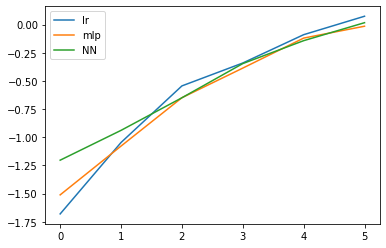

In [41]:
plt.plot(lr)
plt.plot(mlp)
plt.plot(NN)
plt.legend(['lr','mlp', 'NN'])
plt.show()

## Repeat Everything, for last 12 hrs as X

In [43]:
feature, target = split_dataset(12, 6,temp.data)

In [44]:
X_train, X_test, y_train, y_test = train_test_split(feature, target, test_size=0.2)

## Linear regression

In [45]:
model_lr = linear_model.LinearRegression()
model_lr.fit(X_train, y_train)

LinearRegression()

In [46]:
y_pred_lr = model_lr.predict(X_test)
print('R2-score: %.2f'
      % r2_score(y_test, y_pred_lr))
print('Mean_absolute_error: %.2f'
      % mean_absolute_error(y_test, y_pred_lr))
print('Mean_squared_error: %.2f'
      % mean_squared_error(y_test, y_pred_lr))

R2-score: 0.95
Mean_absolute_error: 0.95
Mean_squared_error: 1.92


## MLP

In [50]:
model_mlp = Sequential()
model_mlp.add(Dense(1000, input_shape=(12,), activation='relu'))
model_mlp.add(Dense(512, activation='relu'))
model_mlp.add(Dense(1, activation='linear'))

model_mlp.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_14 (Dense)            (None, 1000)              13000     
                                                                 
 dense_15 (Dense)            (None, 512)               512512    
                                                                 
 dense_16 (Dense)            (None, 1)                 513       
                                                                 
Total params: 526,025
Trainable params: 526,025
Non-trainable params: 0
_________________________________________________________________


In [51]:
model_mlp.compile(loss='mean_absolute_error', optimizer='adam', metrics=['mean_squared_error'])

In [52]:
history_mlp = model_mlp.fit(X_train, y_train, batch_size=256, epochs=20, validation_data=(X_test, y_test))

Epoch 1/20
16/16 [==============================] - 1s 42ms/step - loss: 1.8519 - mean_squared_error: 8.0604 - val_loss: 1.1584 - val_mean_squared_error: 2.6570
Epoch 2/20
16/16 [==============================] - 0s 30ms/step - loss: 1.1242 - mean_squared_error: 2.4594 - val_loss: 1.1063 - val_mean_squared_error: 2.4002
Epoch 3/20
16/16 [==============================] - 0s 30ms/step - loss: 1.0707 - mean_squared_error: 2.2744 - val_loss: 1.0128 - val_mean_squared_error: 2.1349
Epoch 4/20
16/16 [==============================] - 0s 30ms/step - loss: 1.0396 - mean_squared_error: 2.1667 - val_loss: 1.0108 - val_mean_squared_error: 2.0954
Epoch 5/20
16/16 [==============================] - 0s 28ms/step - loss: 1.0051 - mean_squared_error: 2.0561 - val_loss: 0.9817 - val_mean_squared_error: 2.0110
Epoch 6/20
16/16 [==============================] - 0s 30ms/step - loss: 0.9944 - mean_squared_error: 2.0086 - val_loss: 1.1562 - val_mean_squared_error: 2.5038
Epoch 7/20
16/16 [================

In [53]:
[test_mae, test_mse] = model_mlp.evaluate(X_test, y_test)
print("Evaluation result on Test Data : mean_absolute_error = {}, mean_squared_error = {}".format(test_mae, test_mse))

31/31 [==============================] - 0s 4ms/step - loss: 0.9748 - mean_squared_error: 1.9724
Evaluation result on Test Data : mean_absolute_error = 0.9747728109359741, mean_squared_error = 1.9724065065383911


In [54]:
y_pred_mlp = model_mlp.predict(X_test)

## NN

[ref](https://towardsdatascience.com/deep-neural-networks-for-regression-problems-81321897ca33)

In [55]:
NN_model = Sequential()

# The Input Layer :
NN_model.add(Dense(128, kernel_initializer='normal',input_dim = X_train.shape[1], activation='relu'))

# The Hidden Layers :
NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))
NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))
NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))

# The Output Layer :
NN_model.add(Dense(1, kernel_initializer='normal',activation='linear'))

# Compile the network :
NN_model.compile(loss='mean_absolute_error', optimizer='adam', metrics=['mean_absolute_error'])
NN_model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_17 (Dense)            (None, 128)               1664      
                                                                 
 dense_18 (Dense)            (None, 256)               33024     
                                                                 
 dense_19 (Dense)            (None, 256)               65792     
                                                                 
 dense_20 (Dense)            (None, 256)               65792     
                                                                 
 dense_21 (Dense)            (None, 1)                 257       
                                                                 
Total params: 166,529
Trainable params: 166,529
Non-trainable params: 0
_________________________________________________________________


In [56]:
checkpoint_name = 'Weights-{epoch:03d}--{val_loss:.5f}.hdf5' 
checkpoint = ModelCheckpoint(checkpoint_name, monitor='val_loss', verbose = 1, save_best_only = True, mode ='auto')
callbacks_list = [checkpoint]

In [57]:
history_NN = NN_model.fit(X_train, y_train, epochs=120, batch_size=32, validation_split = 0.2, callbacks=callbacks_list)

Epoch 1/120
93/98 [===========================>..] - ETA: 0s - loss: 1.8842 - mean_absolute_error: 1.8842
Epoch 00001: val_loss improved from inf to 1.24455, saving model to Weights-001--1.24455.hdf5
98/98 [==============================] - 1s 8ms/step - loss: 1.8574 - mean_absolute_error: 1.8574 - val_loss: 1.2445 - val_mean_absolute_error: 1.2445
Epoch 2/120
91/98 [==========================>...] - ETA: 0s - loss: 1.1835 - mean_absolute_error: 1.1835
Epoch 00002: val_loss improved from 1.24455 to 1.09347, saving model to Weights-002--1.09347.hdf5
98/98 [==============================] - 1s 5ms/step - loss: 1.1772 - mean_absolute_error: 1.1772 - val_loss: 1.0935 - val_mean_absolute_error: 1.0935
Epoch 3/120
94/98 [===========================>..] - ETA: 0s - loss: 1.0937 - mean_absolute_error: 1.0937
Epoch 00003: val_loss did not improve from 1.09347
98/98 [==============================] - 0s 5ms/step - loss: 1.0924 - mean_absolute_error: 1.0924 - val_loss: 1.2249 - val_mean_absolute_

In [58]:
# Load wights file of the best model :
wights_file = 'Weights-058--0.98939.hdf5' # choose the best checkpoint 
NN_model.load_weights(wights_file) # load it
NN_model.compile(loss='mean_absolute_error', optimizer='adam', metrics=['mean_absolute_error'])

In [59]:
[test_mae,_] = NN_model.evaluate(X_test, y_test)
print("Evaluation result on Test Data : mean_absolute_error = {}".format(test_mae))

31/31 [==============================] - 1s 5ms/step - loss: 0.9727 - mean_absolute_error: 0.9727
Evaluation result on Test Data : mean_absolute_error = 0.9726527333259583


In [60]:
y_pred_NN = NN_model.predict(X_test)

## Compare Models

In [61]:
lr = np.log(y_test - y_pred_lr).mean(axis=0) 
mlp = np.log(y_test - y_pred_mlp).mean(axis=0)
NN = np.log(y_test - y_pred_NN).mean(axis=0)

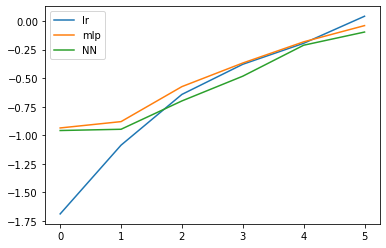

In [62]:
plt.plot(lr)
plt.plot(mlp)
plt.plot(NN)
plt.legend(['lr','mlp', 'NN'])
plt.show()